## Homework 3
### Student Details
**Name:** Atul Parida<br>
**Student ID:** 1006184<br>
**Course ID** 50.007 Machine Learning (Summer 2023)<br>

### Instructions to run
Press *Run All* to run all cells for the given Jupyter notebook. This notebook was compiled using the Python 3.9.13 kernel.

### Notes
The following code provides solutions only for the questions in the homework that require programming. All other solutions have been answered in the PDF file attached to the submission.

### Question 1

Download and install the widely used SVM implementation LIBSVM (https://github.com/cjlin1/libsvm, or https://www.csie.ntu.edu.tw/ ̃cjlin/
libsvm/; clicking on either link takes you to the webpage). We expect you to install the package on your own – this is part of learning how to use off-the-shelf machine learning software. Read the documentation to understand how to use it.

Download promoters.zip. In that folder are training.txt and test.txt, which respectively contain 74 training examples and 32 test examples in LIBSVM format. The goal is to predict whether a certain DNA sequence is a promoter or not based on 57 attributes about the sequence (this is a binary classification task).

Run LIBSVM to classify promoters with different kernels (0-3), using default values for all other parameters. What is your test accuracy for each kernel choice?

In [4]:
### COMMON IMPORTS ###

import numpy as np
import matplotlib.pyplot as plt
from libsvm.svmutil import *
import os

In [16]:
### PATH STORAGE ###

current_path = os.path.curdir
train_path = os.path.join(current_path, 'HW3_data', 'promoters','training.txt')
test_path = os.path.join(current_path, 'HW3_data', 'promoters','test.txt')

### DATA LOADING FUNCTION ###

def load_libsvm_data(file_path):
    y, x = svm_read_problem(file_path)
    return y, x

### DATA LOADING ###

y_train, x_train = load_libsvm_data(train_path)
y_test, x_test = load_libsvm_data(test_path)

In [18]:
# Train and test SVM models with different kernels (0-3)
kernel_choices = [0, 1, 2, 3]
accuracy_results = []

for kernel in kernel_choices:
    print(f"Training SVM with kernel {kernel}...")
    model = svm_train(y_train, x_train, f"-t {kernel}")
    p_label, p_acc, _ = svm_predict(y_test, x_test, model)
    accuracy_results.append(p_acc[0])

# Display test accuracy for each kernel choice
for i, kernel in enumerate(kernel_choices):
    print(f"Test accuracy for kernel {kernel}: {accuracy_results[i]}%")

Training SVM with kernel 0...
Accuracy = 84.375% (27/32) (classification)
Training SVM with kernel 1...
Accuracy = 81.25% (26/32) (classification)
Training SVM with kernel 2...
Accuracy = 90.625% (29/32) (classification)
Training SVM with kernel 3...
Accuracy = 43.75% (14/32) (classification)
Test accuracy for kernel 0: 84.375%
Test accuracy for kernel 1: 81.25%
Test accuracy for kernel 2: 90.625%
Test accuracy for kernel 3: 43.75%


### Question 3
You are given a training set diabetes train.csv. Each row in the file contains the probabil-
ity that a patient has diabetes, followed by values of 20 unknown features (x1,x2,...,x20). Write
Python code to train a logistic regression model with stochastic gradient descent (SGD). Run
SGD for 10,000 iterations, and save the model weights after every 100 iterations. Plot the log-
likelihood of the training data given by your model at every 100 iterations. (Log-likelihood is
log ∏n
i=1 P(yi | xi) = ∑n
i=1 logP(yi | xi) where (xi,yi) is an example.) Provide crystal clear
instructions along with the source code on how to execute it. Try a learning rate of 0.1.
From the values of the weights obtained, which five features do you think are the most important?
How did you choose these five features?

In [27]:
### DATA LOADING ###

q3_train_path = os.path.join(current_path, 'HW3_data', 'train_diabetes.csv')

data = pd.read_csv(q3_train_path, header=None)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [28]:
### DATA PREPROCESSING ###

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]


In [34]:
### FUNCTIONS ###

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.1, iterations=10000, save_every=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.save_every = save_every
        self.weights = None
        self.log_likelihoods = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _log_likelihood(self, X, y, weights):
        z = np.dot(X, weights)
        log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))
        return np.mean(log_probs)

    def fit(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.log_likelihoods = []

        for i in range(self.iterations):
            z = np.dot(X, self.weights)
            predictions = self._sigmoid(z)
            error = y - predictions
            gradient = np.dot(X.T, error) / X.shape[0]
            self.weights += self.learning_rate * gradient

            # Calculate log-likelihood and save it every 'save_every' iterations
            if i % self.save_every == 0:
                self.log_likelihoods.append(self._log_likelihood(X, y, self.weights))

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Model not trained yet. Call fit() first.")
        z = np.dot(X, self.weights)
        return np.round(self._sigmoid(z))

    def predict_proba(self, X):
        if self.weights is None:
            raise ValueError("Model not trained yet. Call fit() first.")
        z = np.dot(X, self.weights)
        return self._sigmoid(z)

    def get_weights(self):
        return self.weights

    def get_log_likelihoods(self):
        return self.log_likelihoods


C:\Users\atulp\AppData\Local\Temp\ipykernel_19052\533623125.py:16: RuntimeWarning: divide by zero encountered in log
  log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))
C:\Users\atulp\AppData\Local\Temp\ipykernel_19052\533623125.py:16: RuntimeWarning: divide by zero encountered in log
  log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))
C:\Users\atulp\AppData\Local\Temp\ipykernel_19052\533623125.py:16: RuntimeWarning: divide by zero encountered in log
  log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))
C:\Users\atulp\AppData\Local\Temp\ipykernel_19052\533623125.py:16: RuntimeWarning: divide by zero encountered in log
  log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid(z))
C:\Users\atulp\AppData\Local\Temp\ipykernel_19052\533623125.py:16: RuntimeWarning: divide by zero encountered in log
  log_probs = y * np.log(self._sigmoid(z)) + (1 - y) * np.log(1 - self._sigmoid

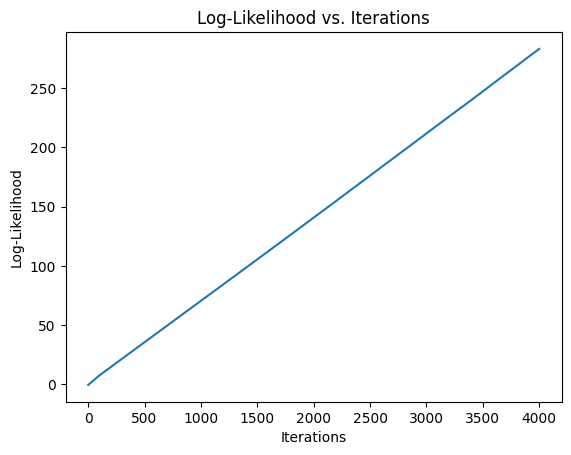

The five most important features are: [ 4 21  3 20  1]


In [33]:
### PLOTTING ###

import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training features and labels
log_reg = LogisticRegressionSGD(learning_rate=0.1, iterations=10000, save_every=100)
log_reg.fit(X_train, y_train)

# Get the trained weights and log-likelihoods
trained_weights = log_reg.get_weights()
log_likelihoods = log_reg.get_log_likelihoods()

# Plot log-likelihoods
iterations = range(0, len(log_likelihoods) * log_reg.save_every, log_reg.save_every)
plt.plot(iterations, log_likelihoods)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Iterations')
plt.show()

# Identify the five most important features
absolute_weights = np.abs(trained_weights)
top_five_indices = np.argsort(absolute_weights)[-5:]
top_five_features = top_five_indices + 1  # Adding 1 to convert from 0-indexed to 1-indexed features

print("The five most important features are:", top_five_features)

